In [1]:
#Importando a biblioteca pandas
import pandas as pd

In [3]:
#Carregando os arquivos do excel
df1 = pd.read_excel("/content/drive/My Drive/Dio - python/Aracaju.xlsx") 
df2 = pd.read_excel("/content/drive/My Drive/Dio - python/Fortaleza.xlsx") 
df3 = pd.read_excel("/content/drive/My Drive/Dio - python/Natal.xlsx") 
df4 = pd.read_excel("/content/drive/My Drive/Dio - python/Recife.xlsx") 
df5 = pd.read_excel("/content/drive/My Drive/Dio - python/Salvador.xlsx")

In [5]:
#Juntando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
 #Criar uma nova coluna - Receita
 df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [9]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [13]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [12]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [15]:
#Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [16]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                     int64
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [17]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [19]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [20]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019
71,Recife,2019-01-01,138.69,983,3,416.07,3.0,2019
131,Recife,2019-03-02,139.07,982,6,834.42,6.0,2019
14,Salvador,2019-01-12,109.01,1035,2,218.02,2.0,2019
202,Natal,2019-01-02,22.45,1036,1,22.45,1.0,2019


In [23]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [24]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1
223,Natal,2019-01-02,40.51,1037,2,81.02,2.0,2019,1,2
81,Natal,2019-04-02,564.00,854,2,1128.00,2.0,2019,4,2
72,Aracaju,2018-01-01,168.95,1523,7,1182.65,7.0,2018,1,1
1,Salvador,2018-01-01,19.02,1034,3,57.06,3.0,2018,1,1


In [28]:
#Retornando a data mais antiga
df["Data"].min()

SyntaxError: ignored

In [29]:
#Calculando a diferenca de dias 
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [30]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
231,Natal,2019-01-03,89.85,1034,2,179.70,2.0,2019,1,3,367 days
39,Natal,2019-01-10,504.00,854,3,1512.00,3.0,2019,1,10,374 days
114,Natal,2019-01-02,25.52,1034,1,25.52,1.0,2019,1,2,366 days
95,Salvador,2019-01-01,5.13,1035,1,5.13,1.0,2019,1,1,365 days
56,Aracaju,2018-01-01,41.90,1523,6,251.40,6.0,2018,1,1,0 days


In [31]:
#Criando a coluna de trimestre
df["semestre_venda"] = df["Data"].dt.quarter

In [34]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
80,Natal,2018-05-23,264.00,852,3,792.00,3.0,2018,5,23,142 days,2
98,Natal,2019-01-02,231.76,1036,3,695.28,3.0,2019,1,2,366 days,1
94,Fortaleza,2019-01-01,150.49,1003,5,752.45,5.0,2019,1,1,365 days,1
227,Salvador,2019-01-02,14.70,1035,1,14.70,1.0,2019,1,2,366 days,1
68,Salvador,2019-01-01,162.35,1037,3,487.05,3.0,2019,1,1,365 days,1


In [35]:
#Filtrandos as vendas de 2019 do mËs de marco
vendas_marco_19 = df.loc[(df["Data"].dt.year== 2019) & (df["Data"].dt.month == 3)]

In [37]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
114,Salvador,2019-03-02,25.52,1034,1,25.52,1.0,2019,3,2,425 days,1
109,Salvador,2019-03-02,124.37,1035,1,124.37,1.0,2019,3,2,425 days,1
129,Recife,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,2019,3,2,425 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1
128,Recife,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,425 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,3.0,2019,3,14,437 days,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1


# **Visualizando os dados**

In [38]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

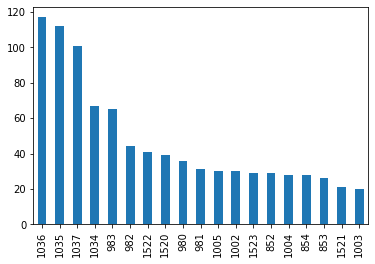

In [40]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

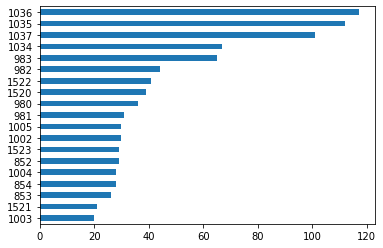

In [44]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

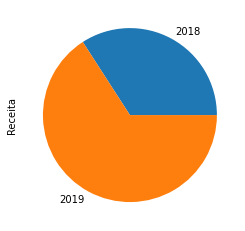

In [45]:
#Grafico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [46]:
#Total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

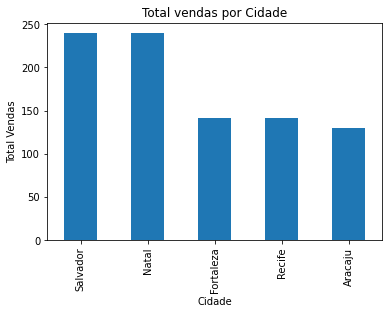

In [49]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

Text(0, 0.5, 'Total Vendas')

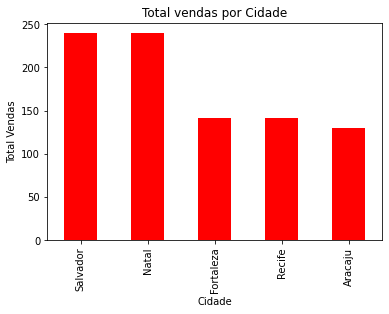

In [51]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [53]:
#Alterando o estilo do grafico
plt.style.use("ggplot")


In [58]:
#Total de vendas por mes
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mes");
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

SyntaxError: ignored

In [60]:
 df.groupby(df["mes_venda"])["Qtde"].sum()
 

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [62]:
df_2019 = df[df["Ano_Venda"] == 2019] 

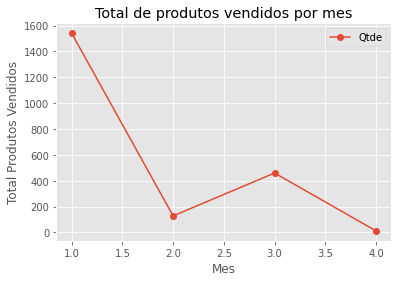

In [68]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o", title = "Total de produtos vendidos por mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

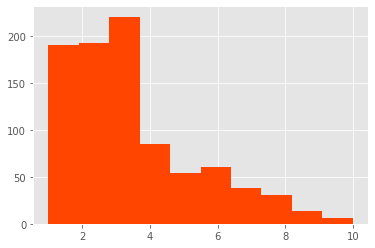

In [72]:
#Histograma
plt.hist(df["Qtde"], color="orangered")

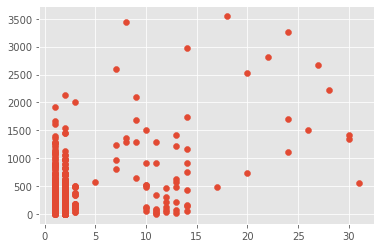

In [74]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

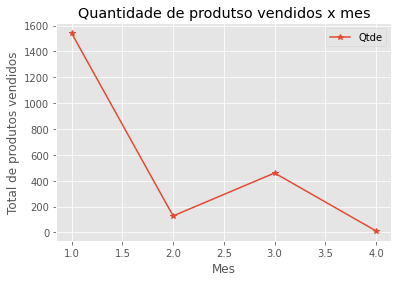

In [77]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.title("Quantidade de produtso vendidos x mes")
plt.xlabel("Mes")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")